<a href="https://colab.research.google.com/github/sarahmcg1/hello-world/blob/master/Seahorse_code_SeedDensity_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas, seaborn, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})
#matplotlib.rcParams.update({'font.size':20,'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

#**0. user-defined variables**

In [ ]:
input_file = '/content/Seed_density_exp_48h-Results.xlsx'

#**1. read data**
##**1.1. OCR**


In [ ]:
#df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=8, nrows=15)
df = pandas.read_excel(input_file, sheet_name='Rate (Columns)', skiprows=8, nrows=9)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ocr=df

before trimming
Index(['time', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10',
       'B11', 'Unnamed: 11', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08',
       'C09', 'C10', 'C11', 'Unnamed: 22', 'D02', 'D03', 'D04', 'D05', 'D06',
       'D07', 'D08', 'D09', 'D10', 'D11', 'Unnamed: 33', 'E02', 'E03', 'E04',
       'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'Unnamed: 44', 'F02',
       'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11',
       'Unnamed: 55', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11'],
      dtype='object')
['Unnamed: 11', 'Unnamed: 22', 'Unnamed: 33', 'Unnamed: 44', 'Unnamed: 55']

after trimming
Index(['time', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10',
       'B11', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10',
       'C11', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10',
       'D11', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10',
 

In [ ]:
ocr

time       B02       B03       B04        B05        B06        B07  \
0   1.310037  9.487783  7.294902  8.100487  16.001773  13.961047  12.523143   
1   7.758357  8.290554  8.785934  8.004983  12.074742  14.706961  13.492761   
2  14.213823  7.884179  9.087586  8.064455  10.668371  13.295893  13.204680   
3  20.763384  3.361798  3.042180  0.595060   4.382143   5.125795   7.923469   
4  27.217252  3.383709  3.336332  2.071206   4.502393   6.069895   9.201498   
5  33.674971  3.630955  3.030776  2.338362   4.106440   5.842366   8.849284   
6  40.215750  2.388690  2.351829  1.276672   2.277956   4.083332   5.872864   
7  46.677243  1.531720  2.284937  1.264735   3.972155   4.402598   5.950916   
8  53.133431  2.245109  2.471140  0.539269   3.418128   4.944027   5.987883   

         B08       B09       B10  ...         G02         G03         G04  \
0  11.200052  6.753887  9.416188  ...  214.409618  178.840435  199.661176   
1  11.093064  7.384598  9.432767  ...  209.948718  181.667198  179.499214   
2   9.907531  8.128402  9.843145  ...  209.194733  181.981978  185.621331   
3   3.812401  0.684899  3.537557  ...   71.982314   65.467088   66.823665   
4   4.589549  1.577131  3.855658  ...   72.164258   65.642802   64.872827   
5   4.833989  1.253408  3.501362  ...   71.020769   64.117827   63.948878   
6   4.629897  1.398720  2.806898  ...   48.642559   44.215785   44.584448   
7   4.389984  2.160105  2.762606  ...   45.783946   42.674118   41.964366   
8   3.876062  1.330375  2.700004  ...   43.994709   39.828621   39.829307   

          G05         G06         G07         G08         G09         G10  \
0  203.570519  215.456099  198.487714  202.961727  192.823161  190.730394   
1  198.138356  211.162158  196.672814  199.826853  191.378026  189.366216   
2  196.544032  211.604079  198.334274  199.311824  190.695524  189.083027   
3   68.760229   81.211749   68.397139   75.476362   69.023323   71.277966   
4   67.725770   79.158951   69.959396   66.310264   69.166487   71.062204   
5   67.810250   78.758559   69.906741   67.380312   68.989808   70.858762   
6   45.939554   53.459887   47.816637   43.711743   47.949914   51.545304   
7   44.788703   51.827775   44.607074   41.779264   46.174909   49.029464   
8   43.207924   51.677222   42.739228   39.645011   43.765099   46.589694   

          G11  
0  188.632371  
1  185.472222  
2  186.566217  
3   68.410578  
4   66.178195  
5   66.745602  
6   46.597702  
7   44.408182  
8   42.068298  

[9 rows x 61 columns]

##**1.2. ECAR**

In [ ]:
#df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=28, nrows=15)
df = pandas.read_excel(input_file, sheet_name='Rate (Columns)', skiprows=22, nrows=9)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ecar=df

before trimming
Index(['time', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10',
       'B11', 'Unnamed: 11', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08',
       'C09', 'C10', 'C11', 'Unnamed: 22', 'D02', 'D03', 'D04', 'D05', 'D06',
       'D07', 'D08', 'D09', 'D10', 'D11', 'Unnamed: 33', 'E02', 'E03', 'E04',
       'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'Unnamed: 44', 'F02',
       'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11',
       'Unnamed: 55', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11'],
      dtype='object')
['Unnamed: 11', 'Unnamed: 22', 'Unnamed: 33', 'Unnamed: 44', 'Unnamed: 55']

after trimming
Index(['time', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10',
       'B11', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10',
       'C11', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10',
       'D11', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10',
 

In [ ]:
ecar

time        B02        B03        B04        B05        B06  \
0   1.310037   4.211608   4.072472   5.992423   5.799015   5.001791   
1   7.758357   4.999441   4.463783   6.244043   6.302829   5.690496   
2  14.213823   4.968923   5.029307   6.444275   6.242968   5.748273   
3  20.763384   8.429710   8.414083  10.640058   9.165608   8.855285   
4  27.217252   8.293672   8.012620   9.993272  17.767032   8.558977   
5  33.674971   8.631238   8.121157  10.304806   8.970446   8.587464   
6  40.215750  11.143231  10.805595  13.179235  11.573646  11.535708   
7  46.677243   8.521856   8.114178  10.519486   8.987796   8.699411   
8  53.133431   8.528463   7.938743  10.188342   8.913891   8.293406   

         B07        B08        B09        B10  ...         G02         G03  \
0   5.122067   4.724381   4.702188   4.586611  ...   47.755892   42.910692   
1   5.684252   5.451887   3.801689   4.851718  ...   49.851986   44.851801   
2   5.769022   5.455422   4.620121   4.758213  ...   50.111293   45.336770   
3   9.504839   9.562995   8.582705   8.093308  ...  109.297050   99.325550   
4   2.838057   9.244902   8.095870   8.025122  ...  103.899959   93.792450   
5   7.295414   8.934700   8.109166   8.209973  ...  104.006377   92.922573   
6  10.678668  12.072235  11.133104  10.794018  ...  113.760878  101.049843   
7   8.327799   9.496532   8.493878   8.171010  ...  110.493838   98.205674   
8   7.938226   9.242594   8.269673   7.784583  ...  112.379273  100.166089   

          G04         G05         G06         G07         G08         G09  \
0   50.480279   48.310527   53.452622   48.516731   51.358983   46.265146   
1   57.360902   48.414481   54.903100   50.478958   53.139980   45.248259   
2   58.150709   49.498108   55.985964   50.782231   53.431299   45.736189   
3  122.860361  108.611820  113.806526  110.192490  111.164359  100.506984   
4  124.019093  103.864827  109.965375  104.859434  110.355273   98.813595   
5  126.459597  103.448633  108.386801  104.120193  109.664754   99.037198   
6  134.379776  108.200237  115.646161  110.491779  116.815667  100.969563   
7  132.288308  106.898083  111.779754  107.876366  114.054210  101.226503   
8  134.673485  108.605552  115.141829  110.411467  116.554879  103.665486   

          G10         G11  
0   44.217776   50.488470  
1   45.430949   52.991407  
2   45.667575   52.462998  
3   99.921303  110.982354  
4   95.275098  104.682509  
5   93.957325  102.406591  
6   97.832703  122.692178  
7   97.146261  121.858681  
8  100.739625  122.709578  

[9 rows x 61 columns]

In [ ]:
timepoints = ocr['time']
print(timepoints)
timepoints = ecar['time']
print(timepoints)

0     1.310037
1     7.758357
2    14.213823
3    20.763384
4    27.217252
5    33.674971
6    40.215750
7    46.677243
8    53.133431
Name: time, dtype: float64
0     1.310037
1     7.758357
2    14.213823
3    20.763384
4    27.217252
5    33.674971
6    40.215750
7    46.677243
8    53.133431
Name: time, dtype: float64


In [ ]:
del df

#**2. Oxygen consumption rate (OCR)**

In [ ]:
boxplot_basal = []
boxplot_maximal = []

In [ ]:
seed_1000 = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
seed_2500 = ['C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11']
seed_5000 = ['D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11']
seed_15000 = ['E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11']
seed_30000 = ['F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11']
seed_60000 = ['G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11']

In [ ]:
seed_1000_representative = seed_1000
seed_2500_representative = seed_2500
seed_5000_representative = seed_5000
seed_15000_representative = seed_15000
seed_30000_representative = ['F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F11']
seed_60000_representative = seed_60000

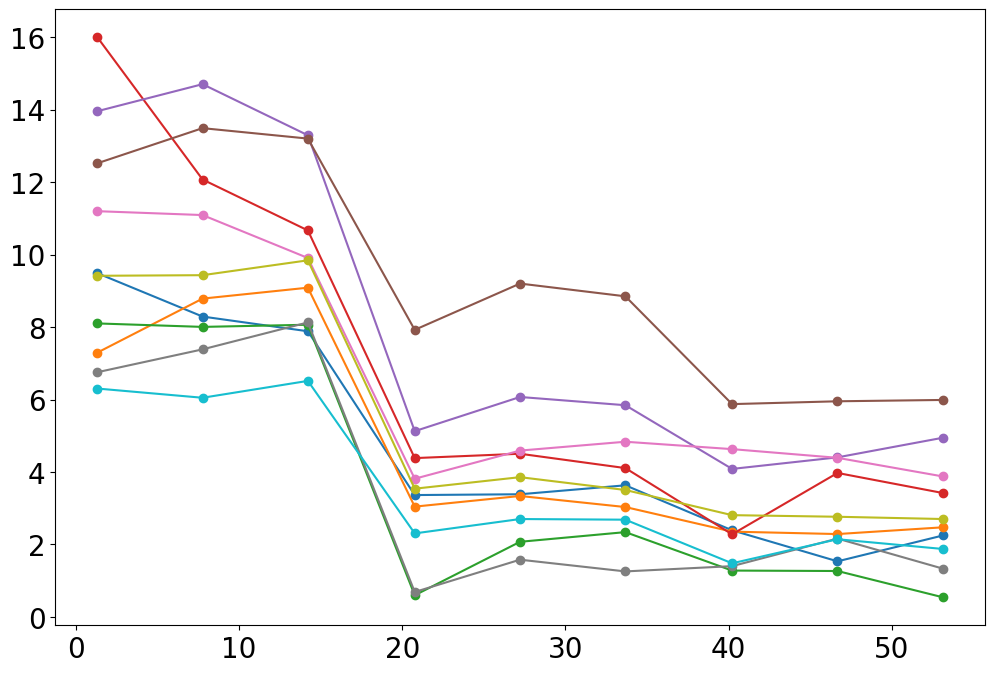

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[seed_1000], 'o-')
matplotlib.pyplot.show()

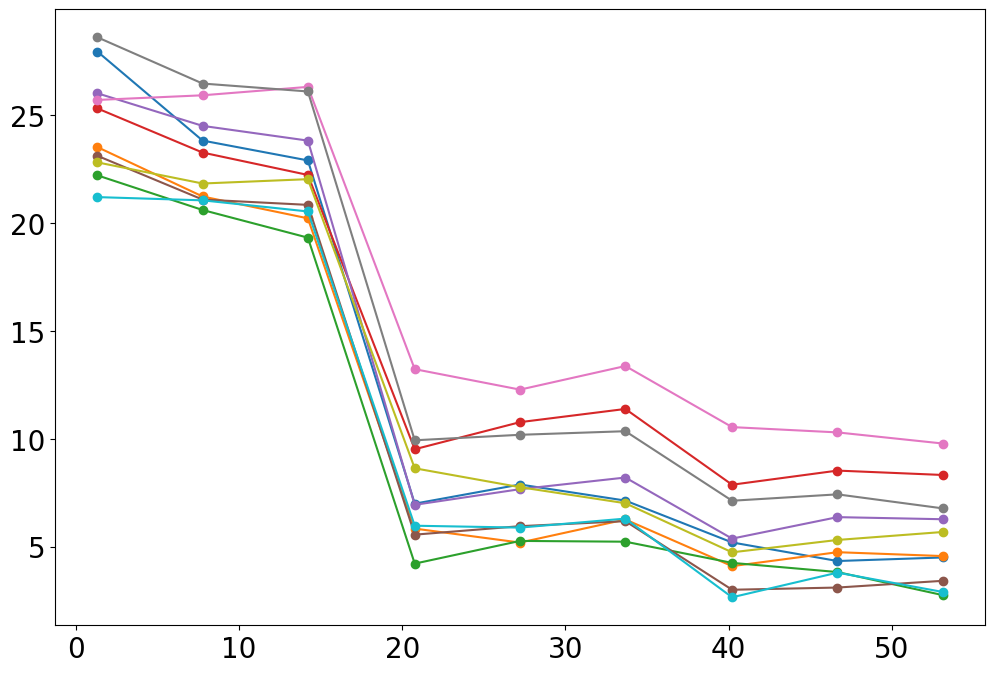

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[seed_2500], 'o-')
matplotlib.pyplot.show()

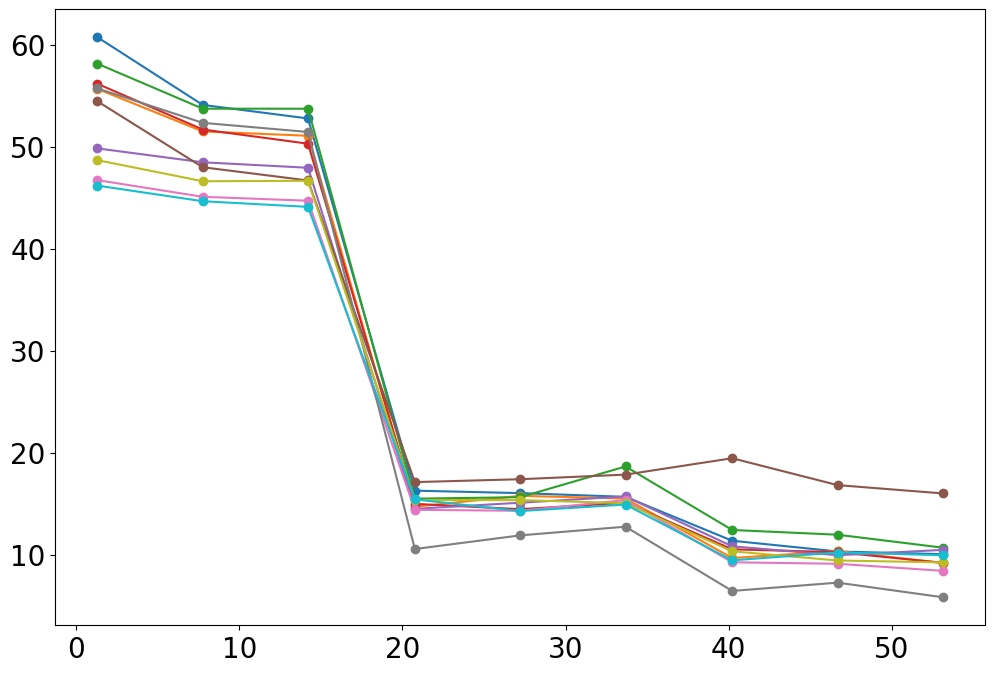

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[seed_5000], 'o-')
matplotlib.pyplot.show()

In [ ]:
#matplotlib.pyplot.plot(timepoints, ocr[seed_5000_representative], 'o-')
#matplotlib.pyplot.show()

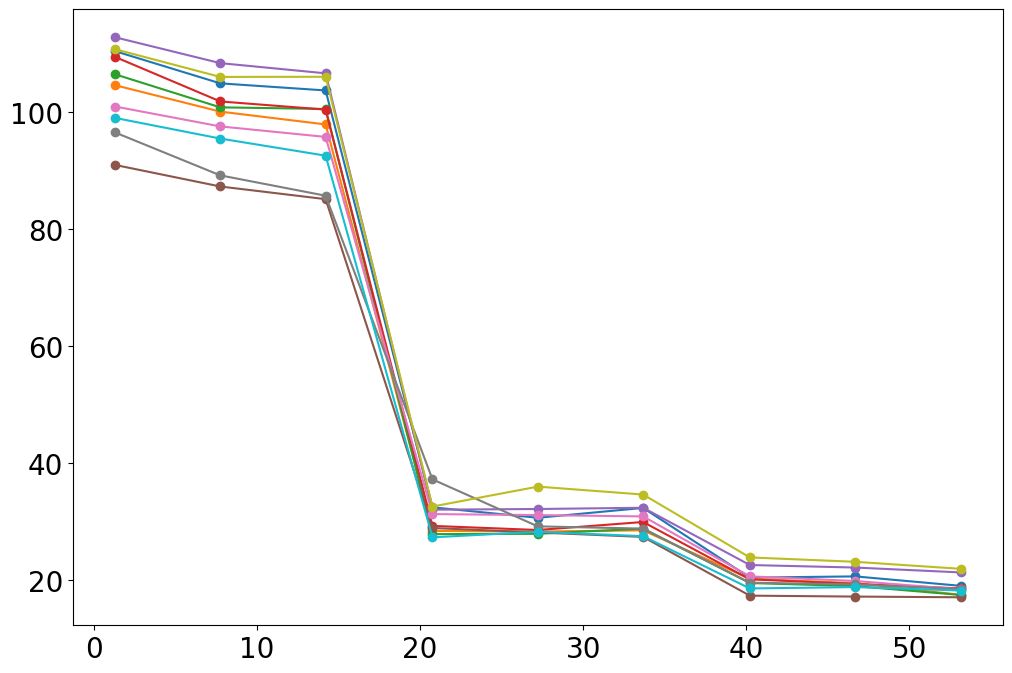

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[seed_15000], 'o-')
matplotlib.pyplot.show()

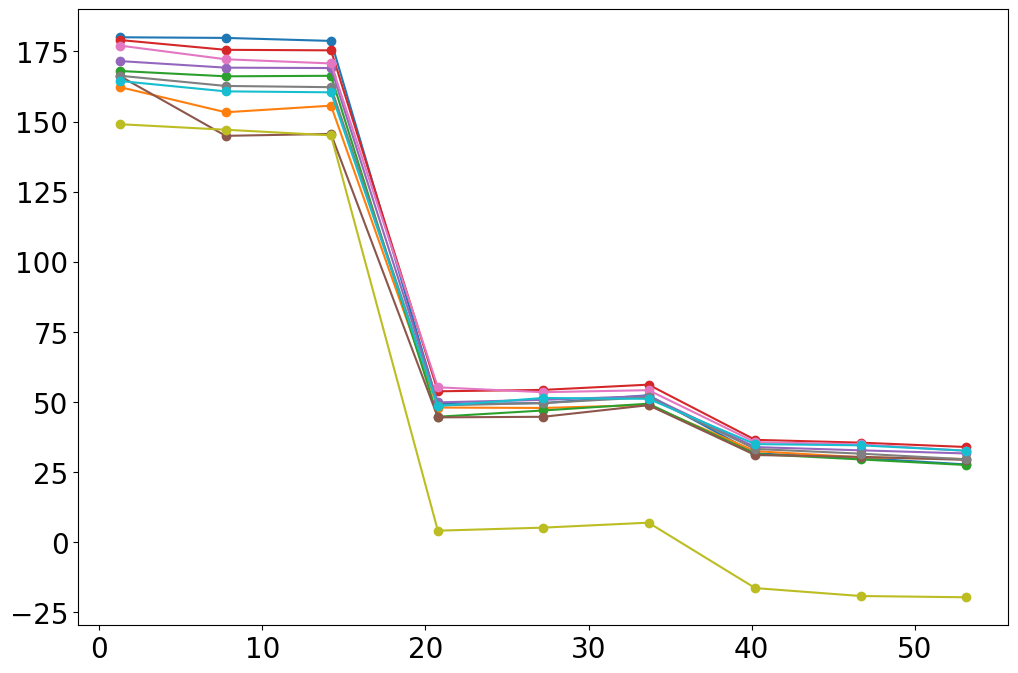

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[seed_30000], 'o-')
matplotlib.pyplot.show()

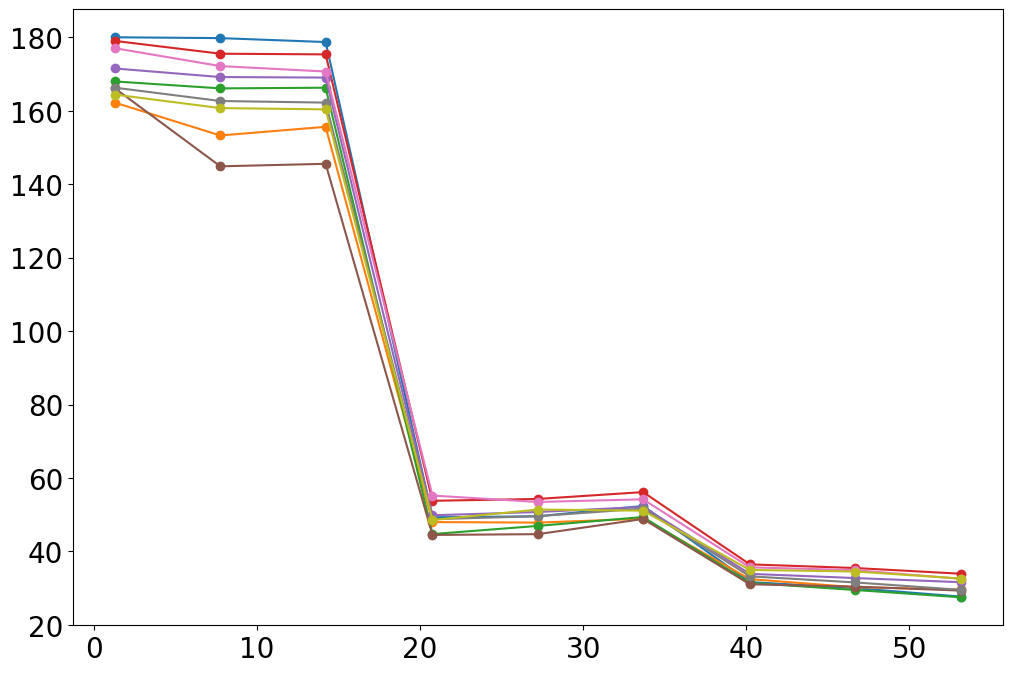

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[seed_30000_representative], 'o-')
matplotlib.pyplot.show()

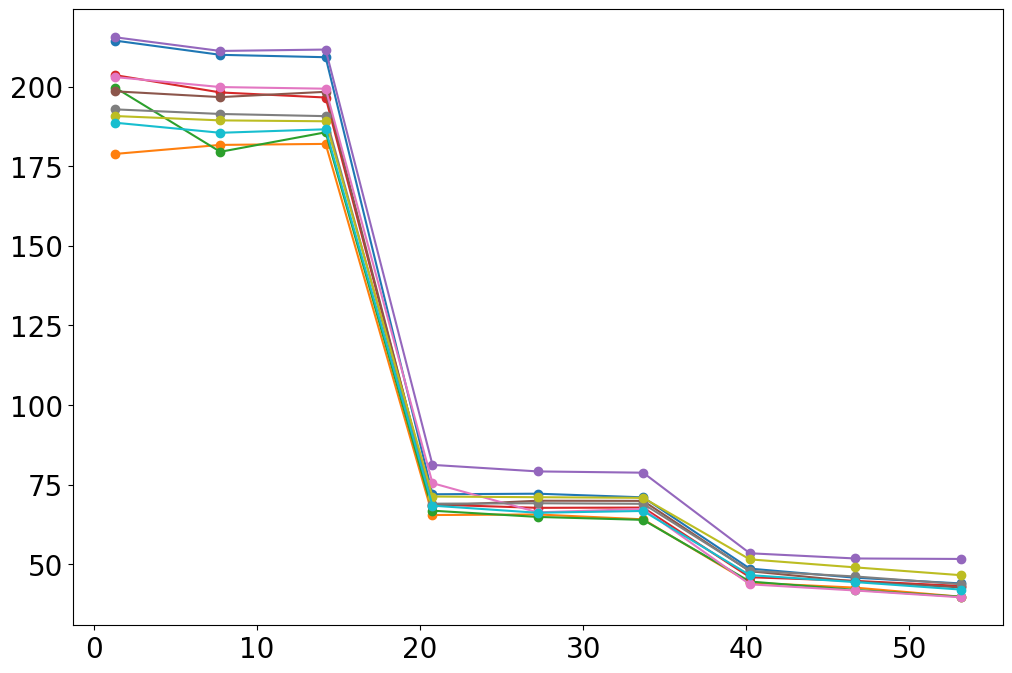

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[seed_60000], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[seed_1000_representative].mean()/ocr[seed_1000_representative].mean().mean()
print(relative_mu)
normalized_1000 = ocr[seed_1000_representative]/relative_mu

relative_mu = ocr[seed_2500_representative].mean()/ocr[seed_2500_representative].mean().mean()
print(relative_mu)
normalized_2500 = ocr[seed_2500_representative]/relative_mu

relative_mu = ocr[seed_5000_representative].mean()/ocr[seed_5000_representative].mean().mean()
print(relative_mu)
normalized_5000 = ocr[seed_5000_representative]/relative_mu

relative_mu = ocr[seed_15000_representative].mean()/ocr[seed_15000_representative].mean().mean()
print(relative_mu)
normalized_15000 = ocr[seed_15000_representative]/relative_mu

relative_mu = ocr[seed_30000_representative].mean()/ocr[seed_30000_representative].mean().mean()
print(relative_mu)
normalized_30000 = ocr[seed_30000_representative]/relative_mu

relative_mu = ocr[seed_60000_representative].mean()/ocr[seed_60000_representative].mean().mean()
print(relative_mu)
normalized_60000 = ocr[seed_60000_representative]/relative_mu

B02    0.840911
B03    0.830572
B04    0.642675
B05    1.223457
B06    1.443182
B07    1.653877
B08    1.162256
B09    0.611120
B10    0.953519
B11    0.638431
dtype: float64
C02    1.001768
C03    0.865548
C04    0.793278
C05    1.150951
C06    1.042017
C07    0.834793
C08    1.334064
C09    1.203173
C10    0.957392
C11    0.817017
dtype: float64
D02    1.080986
D03    1.020336
D04    1.094618
D05    1.016907
D06    0.973759
D07    1.109205
D08    0.906284
D09    0.936345
D10    0.947302
D11    0.914257
dtype: float64
E02    1.053115
E03    0.987488
E04    0.994910
E05    1.015309
E06    1.088285
E07    0.886331
E08    0.990799
E09    0.940699
E10    1.098324
E11    0.944739
dtype: float64
F02    1.042969
F03    0.947994
F04    0.976993
F05    1.070941
F06    1.018295
F07    0.917435
F08    1.051971
F09    0.984572
F11    0.988830
dtype: float64
G02    1.058359
G03    0.926800
G04    0.950784
G05    1.004048
G06    1.108937
G07    1.004515
G08    1.003960
G09    0.986337
G10    0.9966

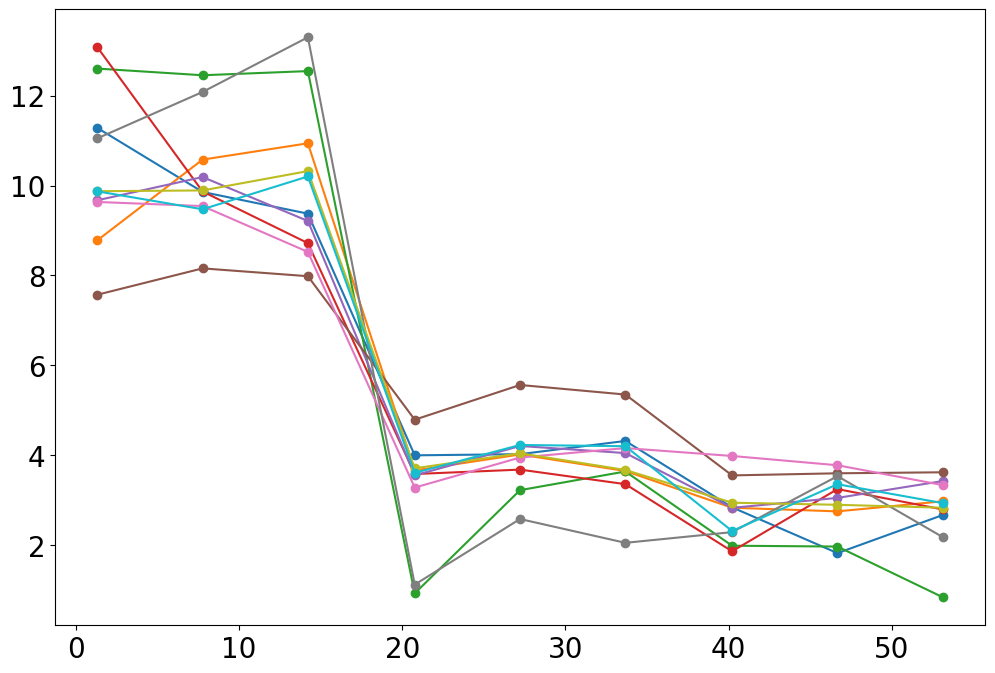

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_1000, 'o-')
matplotlib.pyplot.show()

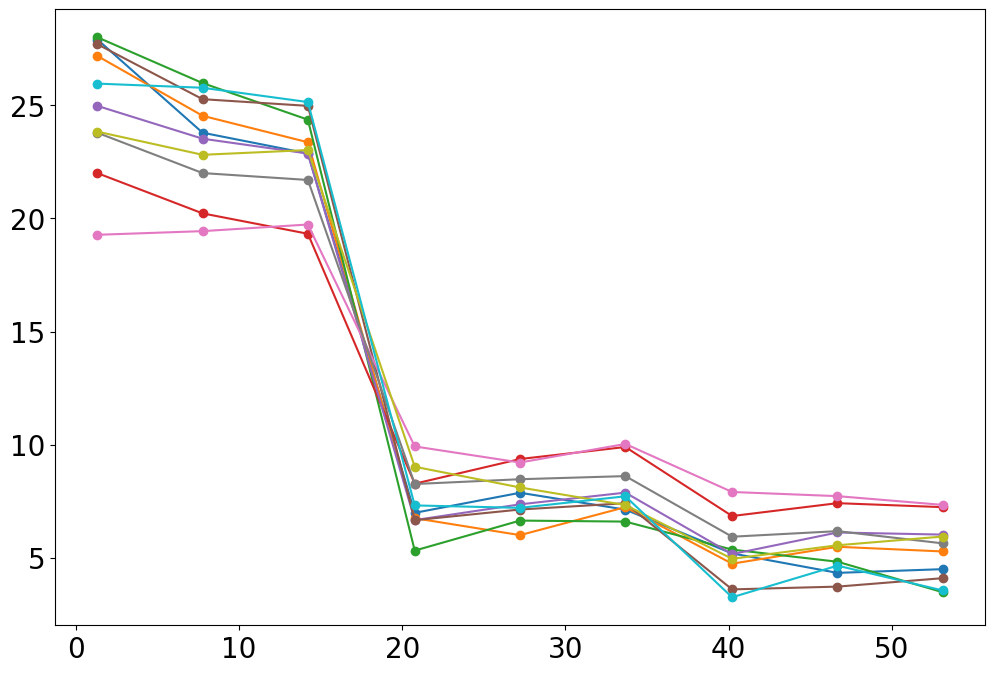

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_2500, 'o-')
matplotlib.pyplot.show()

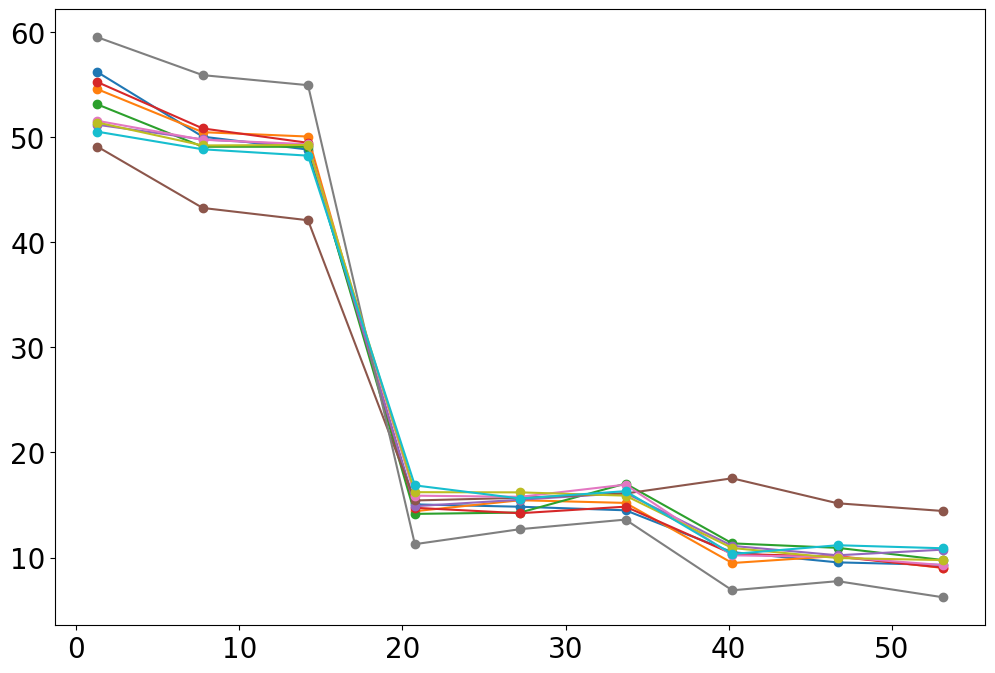

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_5000, 'o-')
matplotlib.pyplot.show()

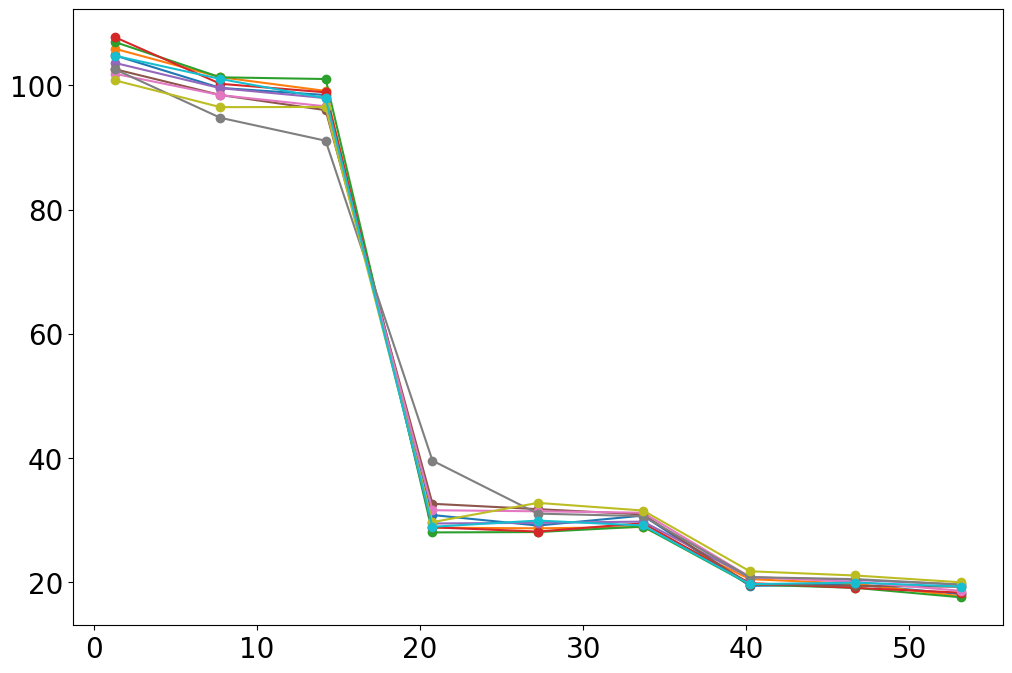

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_15000, 'o-')
matplotlib.pyplot.show()

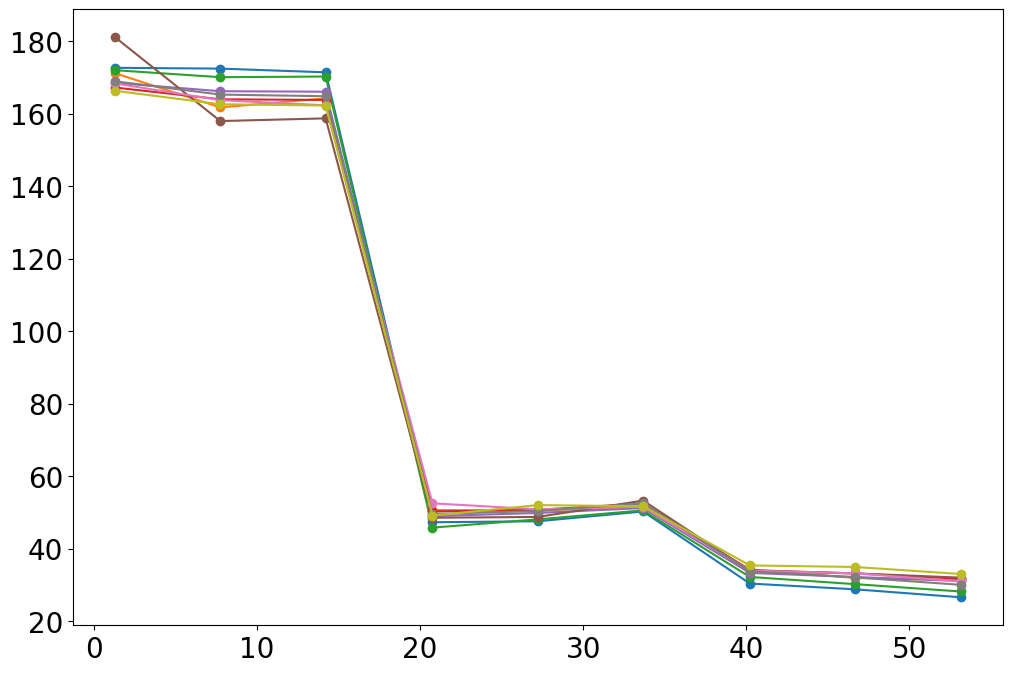

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_30000, 'o-')
matplotlib.pyplot.show()

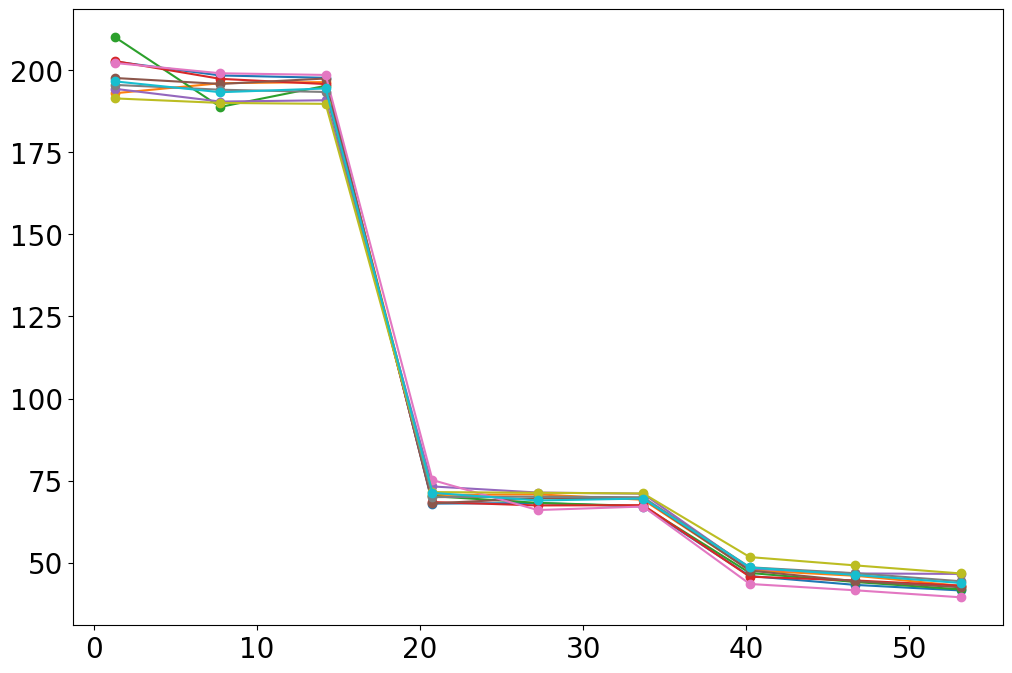

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_60000, 'o-')
matplotlib.pyplot.show()

###**2.1.4. build figure**

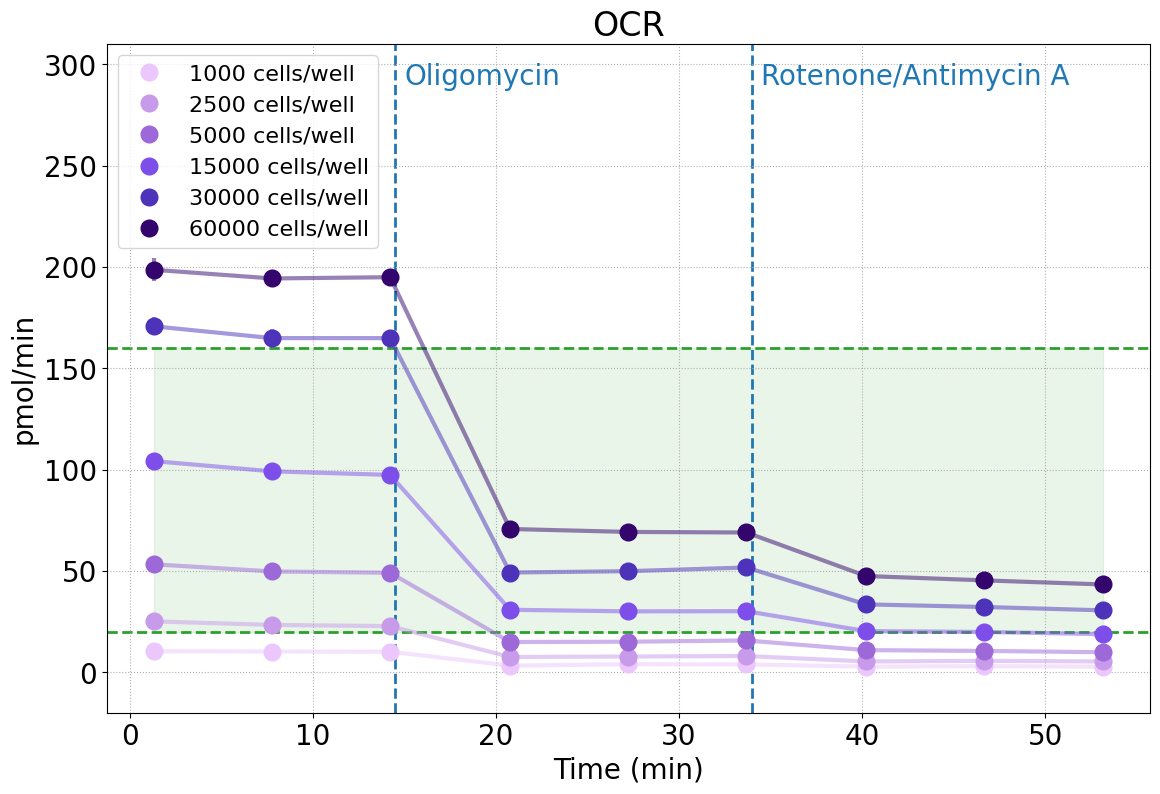

In [ ]:
mean = normalized_1000.mean(axis=1)
std = normalized_1000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#ECC7FD', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#ECC7FD', ms=12, label='1000 cells/well', zorder=999)

mean = normalized_2500.mean(axis=1)
std = normalized_2500.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#C89AEA', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#C89AEA', ms=12, label='2500 cells/well', zorder=999)

mean = normalized_5000.mean(axis=1)
std = normalized_5000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#9D68D8', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#9D68D8', ms=12, label='5000 cells/well', zorder=999)

mean = normalized_15000.mean(axis=1)
std = normalized_15000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#7E4EEB', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#7E4EEB', ms=12, label='15000 cells/well', zorder=999)

mean = normalized_30000.mean(axis=1)
std = normalized_30000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#4D32BA', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#4D32BA', ms=12, label='30000 cells/well', zorder=999)

mean = normalized_60000.mean(axis=1)
std = normalized_60000.std(axis=1)
#mean = orange.mean(axis=1)
#std = orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#33056D', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#33056D', ms=12, label='60000 cells/well', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=14.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.axhline(y=20, ls='--', lw=2, color='tab:green', zorder=1)
matplotlib.pyplot.axhline(y=160, ls='--', lw=2, color='tab:green', zorder=1)

matplotlib.pyplot.fill_between(timepoints, 20, 160, color='tab:green', alpha=0.1, zorder=0)

matplotlib.pyplot.text(15, 290, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(34.5, 290, 'Rotenone/Antimycin A', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([-20, 310])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR')
matplotlib.pyplot.legend(loc=2, prop={'size': 16})

matplotlib.pyplot.savefig('ocr.48h_seed_exp.ea.png')

In [ ]:
a = ocr[seed_1000].iloc[2, :].to_list()
b = ocr[seed_2500].iloc[2, :].to_list()
c = ocr[seed_5000].iloc[2, :].to_list()
d = ocr[seed_15000].iloc[2, :].to_list()
e = ocr[seed_30000].iloc[2, :].to_list()
f = ocr[seed_60000].iloc[2, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c); boxplot_basal.append(d); boxplot_basal.append(e); boxplot_basal.append(f)

In [ ]:
print(len(a), len(b), len(c), len(d), len(e), len(f))

10 10 10 10 10 10


In [ ]:
boxplot_basal_df = pandas.DataFrame({
    '1000': a,
    '2500': b,
    '5000': c,
    '15000': d,
    '30000': e,
    '60000': f
})

In [ ]:
boxplot_basal_df

1000       2500       5000       15000       30000       60000
0   7.884179  22.913925  52.775656  103.667135  178.761203  209.194733
1   9.087586  20.228397  51.078710   97.857747  155.667651  181.981978
2   8.064455  19.331845  53.730570  100.503785  166.318449  185.621331
3  10.668371  22.240335  50.299160  100.391148  175.397100  196.544032
4  13.295893  23.832609  47.941258  106.592761  169.083410  211.604079
5  13.204680  20.852571  46.694616   85.090803  145.594205  198.334274
6   9.907531  26.324163  44.708125   95.726887  170.730955  199.311824
7   8.128402  26.112121  51.449971   85.678614  162.262130  190.695524
8   9.843145  22.044337  46.663778  106.002025  145.087533  189.083027
9   6.514120  20.546795  44.105774   92.521893  160.425393  186.566217

##**2.3. boxplots**

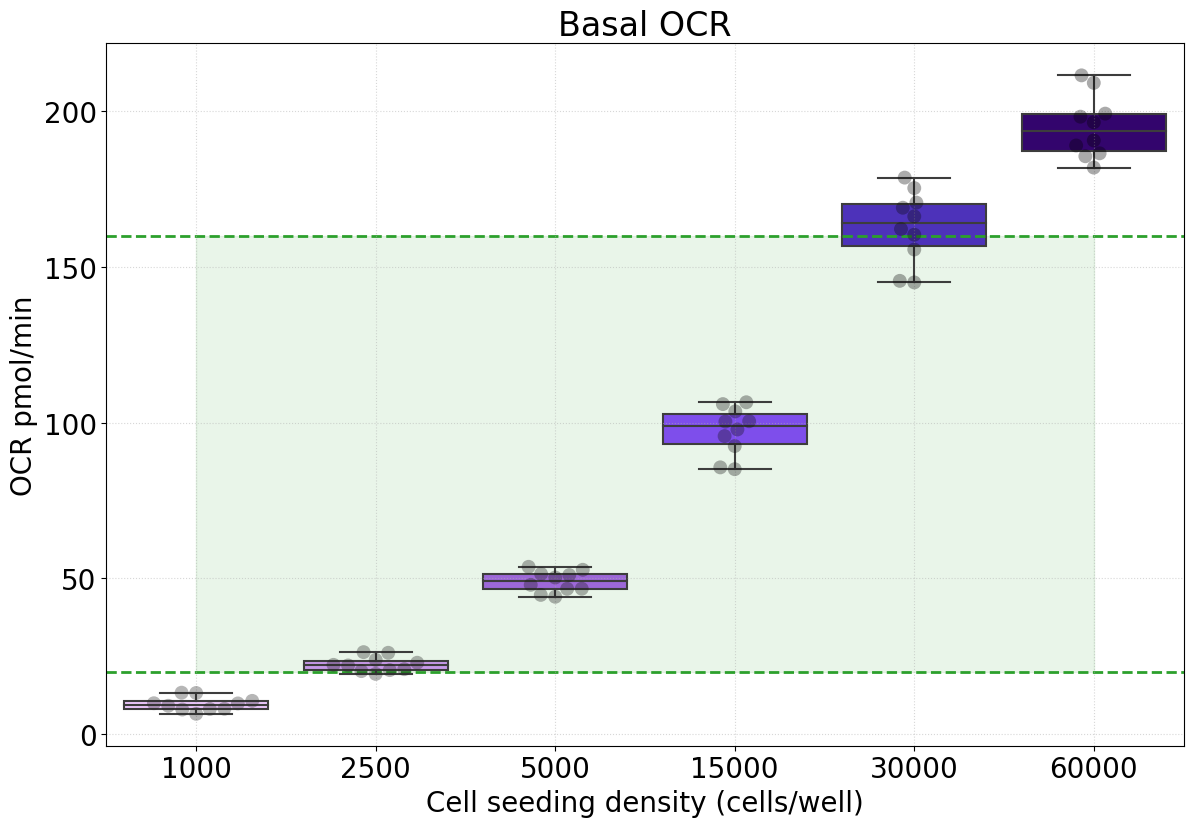

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_basal_df, showfliers=False)

# Define the colors for the boxes
colors = ['#ECC7FD', '#C89AEA', '#9D68D8', '#7E4EEB', '#4D32BA', '#33056D']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_basal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Basal OCR')
matplotlib.pyplot.xlabel('Cell seeding density (cells/well)')
matplotlib.pyplot.ylabel('OCR pmol/min')

matplotlib.pyplot.axhline(y=20, ls='--', lw=2, color='tab:green', zorder=1)
matplotlib.pyplot.axhline(y=160, ls='--', lw=2, color='tab:green', zorder=1)

# Shade the region between the horizontal lines
categories = ['1000', '2500', '5000', '15000', '30000', '60000']
x_values = range(len(categories))
matplotlib.pyplot.fill_between(x_values, 20, 160, color='tab:green', alpha=0.1, zorder=0)


matplotlib.pyplot.savefig('ocr.basal.48h_seed_exp.png')

#**3. ECAR**

In [ ]:
boxplot_basal = []
boxplot_maximal = []

In [ ]:
ecar

time        B02        B03        B04        B05        B06  \
0   1.310037   4.211608   4.072472   5.992423   5.799015   5.001791   
1   7.758357   4.999441   4.463783   6.244043   6.302829   5.690496   
2  14.213823   4.968923   5.029307   6.444275   6.242968   5.748273   
3  20.763384   8.429710   8.414083  10.640058   9.165608   8.855285   
4  27.217252   8.293672   8.012620   9.993272  17.767032   8.558977   
5  33.674971   8.631238   8.121157  10.304806   8.970446   8.587464   
6  40.215750  11.143231  10.805595  13.179235  11.573646  11.535708   
7  46.677243   8.521856   8.114178  10.519486   8.987796   8.699411   
8  53.133431   8.528463   7.938743  10.188342   8.913891   8.293406   

         B07        B08        B09        B10  ...         G02         G03  \
0   5.122067   4.724381   4.702188   4.586611  ...   47.755892   42.910692   
1   5.684252   5.451887   3.801689   4.851718  ...   49.851986   44.851801   
2   5.769022   5.455422   4.620121   4.758213  ...   50.111293   45.336770   
3   9.504839   9.562995   8.582705   8.093308  ...  109.297050   99.325550   
4   2.838057   9.244902   8.095870   8.025122  ...  103.899959   93.792450   
5   7.295414   8.934700   8.109166   8.209973  ...  104.006377   92.922573   
6  10.678668  12.072235  11.133104  10.794018  ...  113.760878  101.049843   
7   8.327799   9.496532   8.493878   8.171010  ...  110.493838   98.205674   
8   7.938226   9.242594   8.269673   7.784583  ...  112.379273  100.166089   

          G04         G05         G06         G07         G08         G09  \
0   50.480279   48.310527   53.452622   48.516731   51.358983   46.265146   
1   57.360902   48.414481   54.903100   50.478958   53.139980   45.248259   
2   58.150709   49.498108   55.985964   50.782231   53.431299   45.736189   
3  122.860361  108.611820  113.806526  110.192490  111.164359  100.506984   
4  124.019093  103.864827  109.965375  104.859434  110.355273   98.813595   
5  126.459597  103.448633  108.386801  104.120193  109.664754   99.037198   
6  134.379776  108.200237  115.646161  110.491779  116.815667  100.969563   
7  132.288308  106.898083  111.779754  107.876366  114.054210  101.226503   
8  134.673485  108.605552  115.141829  110.411467  116.554879  103.665486   

          G10         G11  
0   44.217776   50.488470  
1   45.430949   52.991407  
2   45.667575   52.462998  
3   99.921303  110.982354  
4   95.275098  104.682509  
5   93.957325  102.406591  
6   97.832703  122.692178  
7   97.146261  121.858681  
8  100.739625  122.709578  

[9 rows x 61 columns]

In [ ]:
seed_1000 = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
seed_2500 = ['C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11']
seed_5000 = ['D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11']
seed_15000 = ['E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11']
seed_30000 = ['F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11']
seed_60000 = ['G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11']

In [ ]:
seed_1000_representative = ['B02', 'B03', 'B04', 'B06', 'B08', 'B09', 'B10', 'B11']
seed_2500_representative = ['C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']
seed_5000_representative = ['D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10']
seed_15000_representative = ['E02', 'E03', 'E05', 'E06', 'E07', 'E08', 'E10', 'E11']
seed_30000_representative = ['F02', 'F03', 'F04', 'F05', 'F06', 'F08', 'F09', 'F10', 'F11']
seed_60000_representative = seed_60000

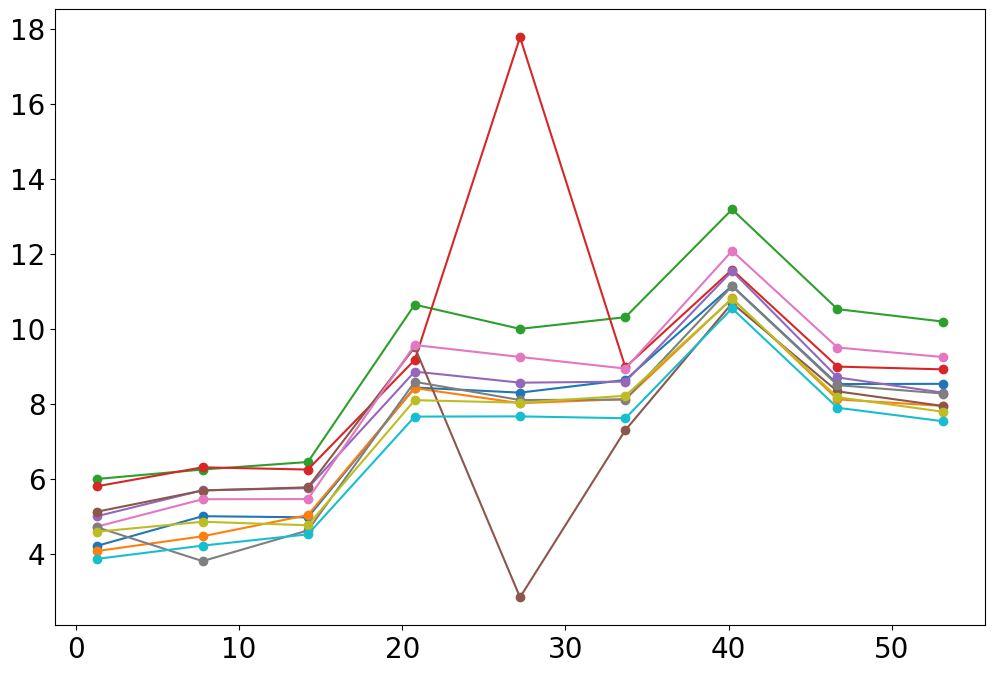

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_1000], 'o-')
matplotlib.pyplot.show()

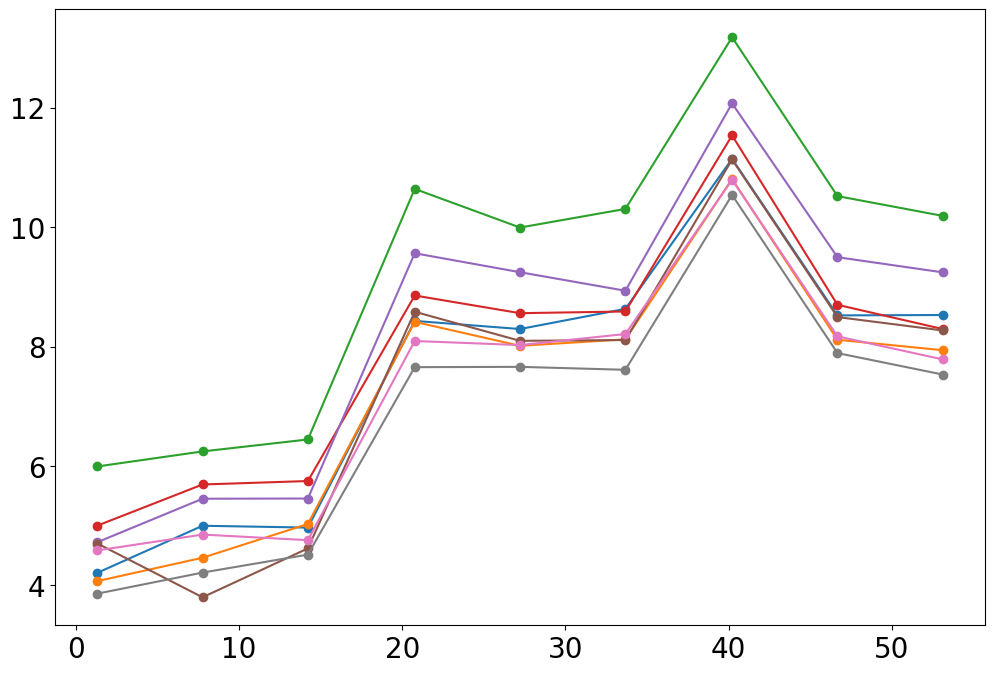

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_1000_representative], 'o-')
matplotlib.pyplot.show()

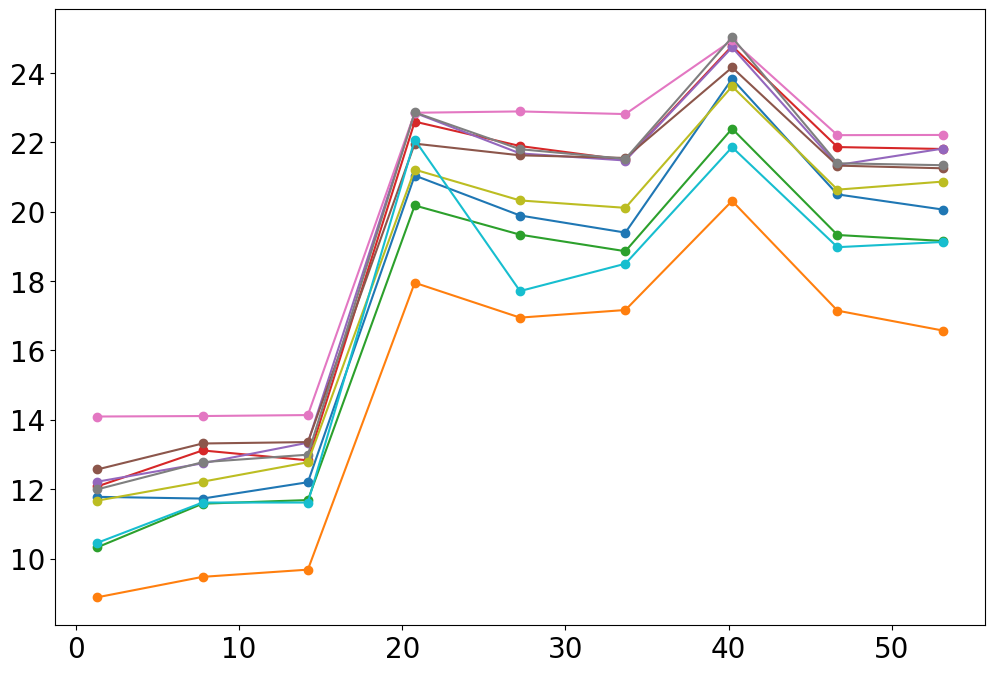

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_2500], 'o-')
matplotlib.pyplot.show()

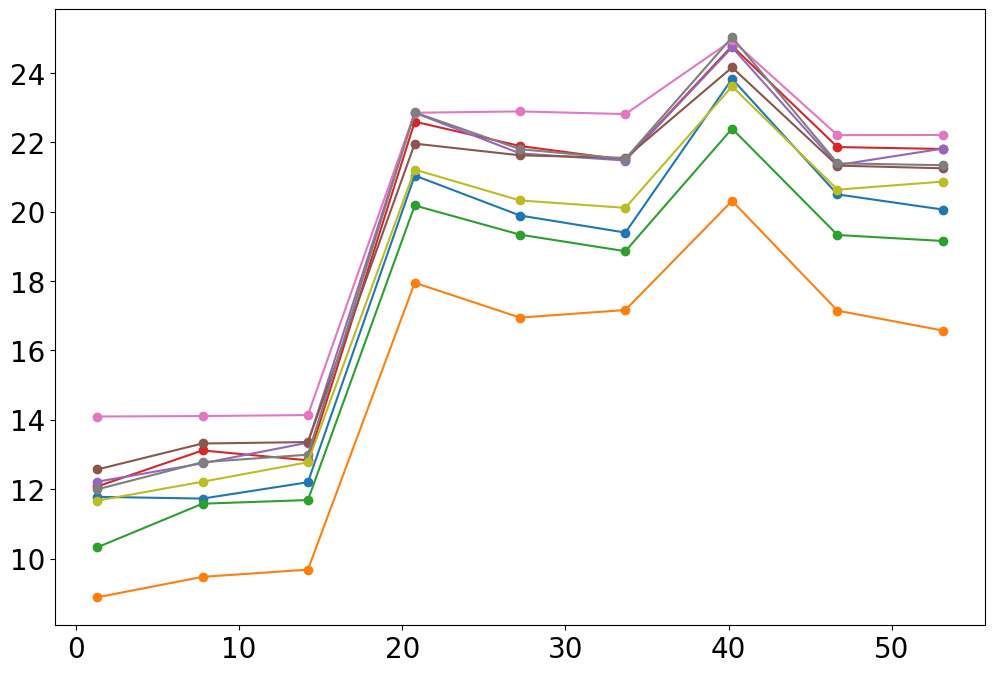

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_2500_representative], 'o-')
matplotlib.pyplot.show()

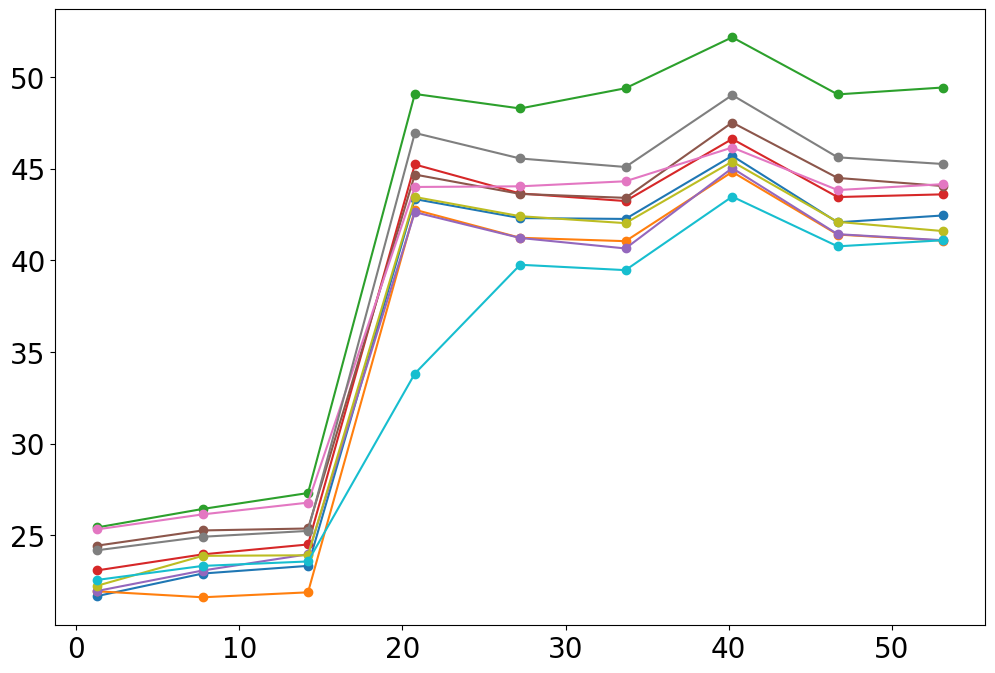

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_5000], 'o-')
matplotlib.pyplot.show()

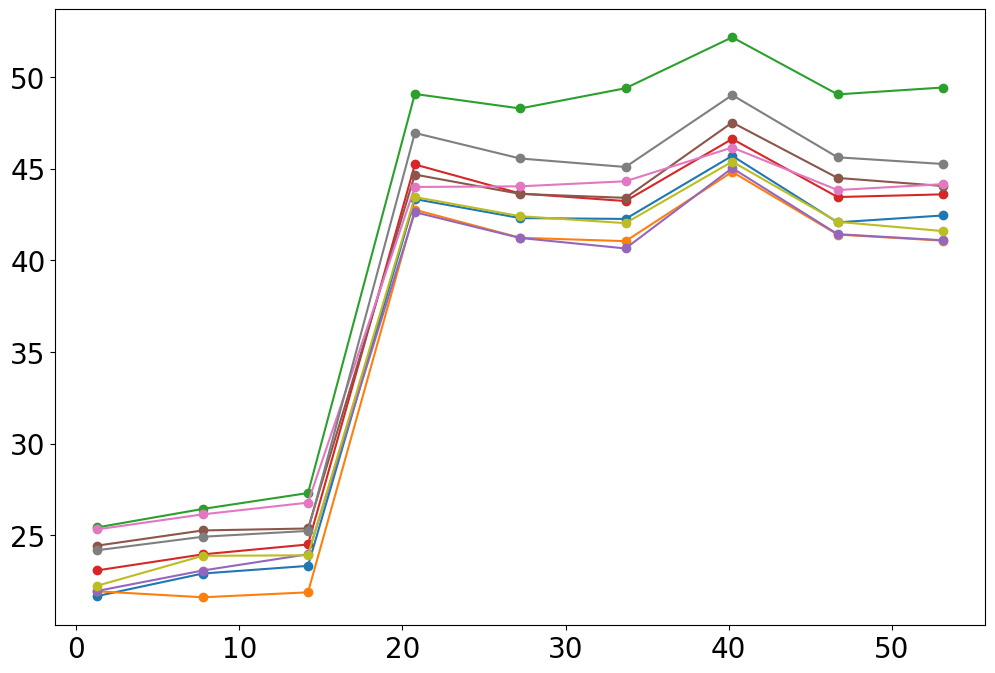

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_5000_representative], 'o-')
matplotlib.pyplot.show()

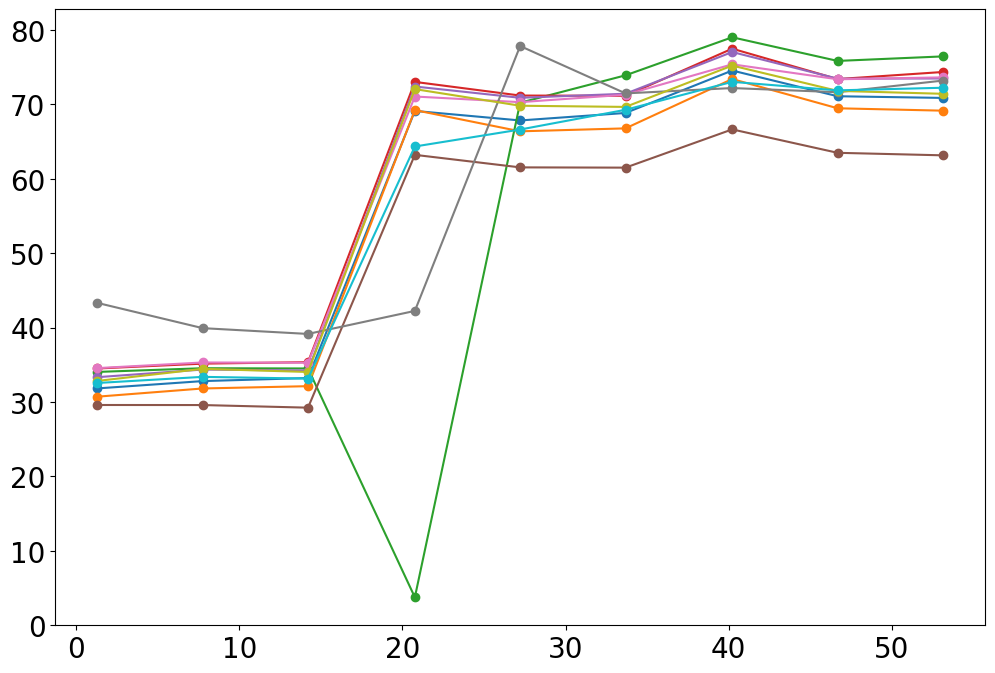

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_15000], 'o-')
matplotlib.pyplot.show()

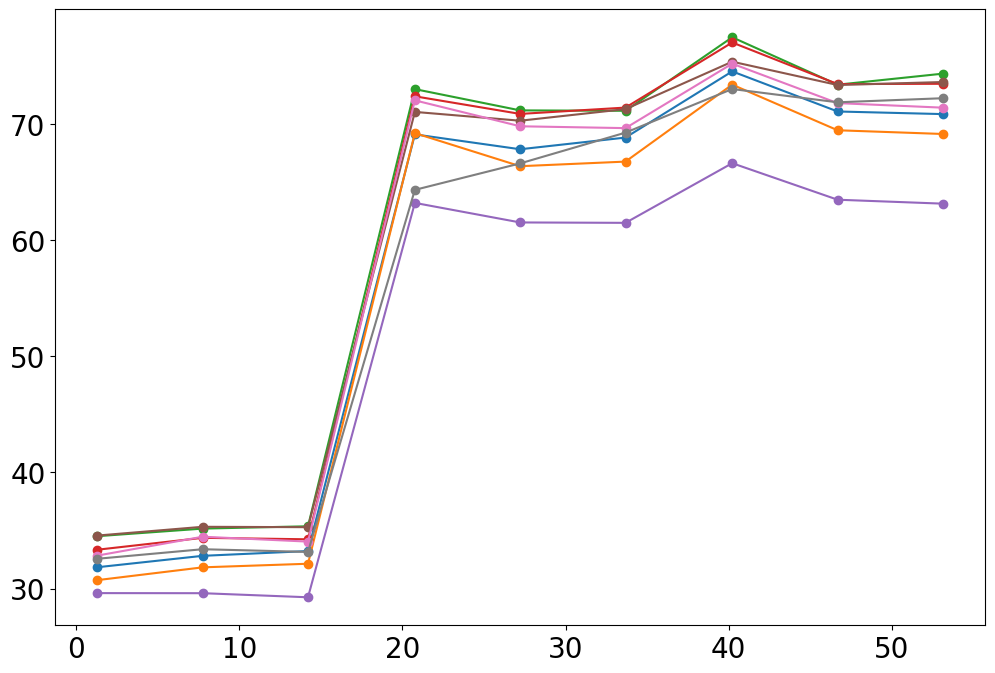

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_15000_representative], 'o-')
matplotlib.pyplot.show()

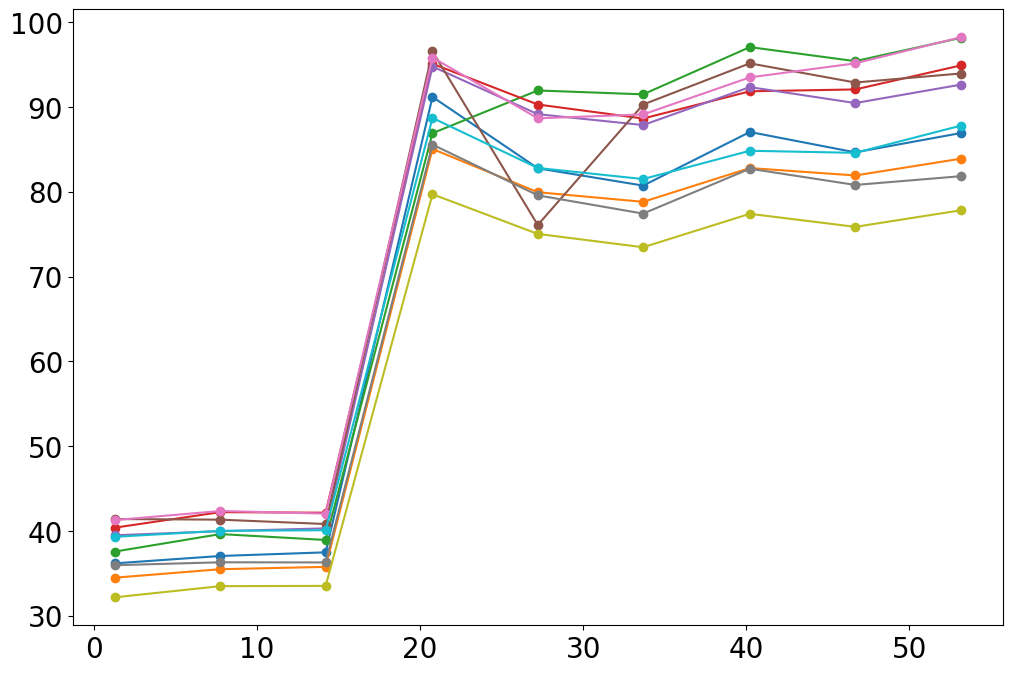

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_30000], 'o-')
matplotlib.pyplot.show()

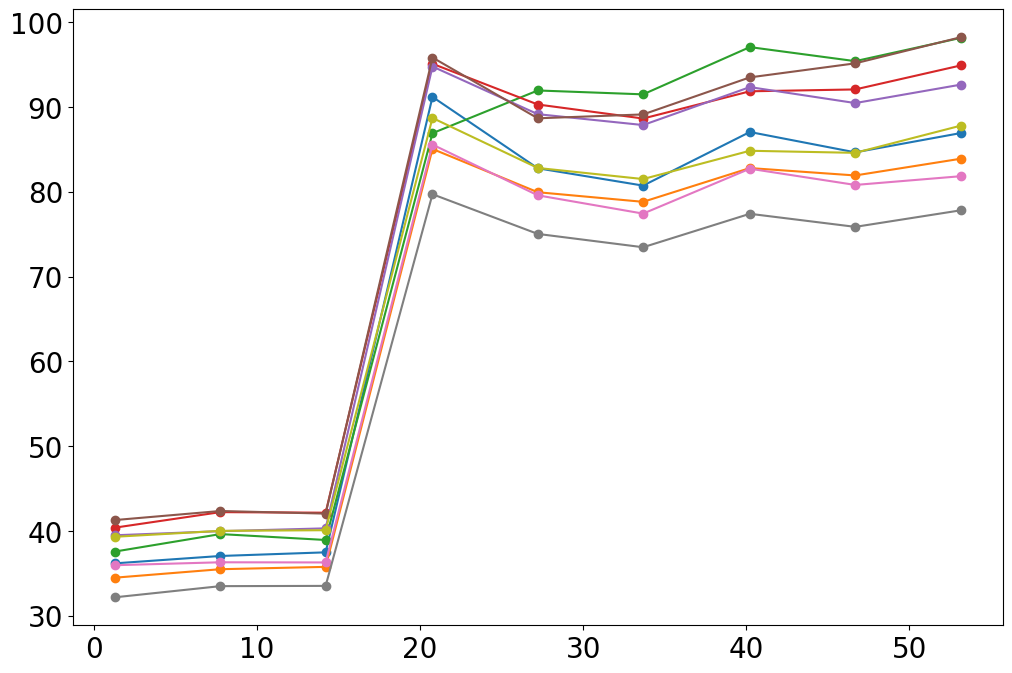

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_30000_representative], 'o-')
matplotlib.pyplot.show()

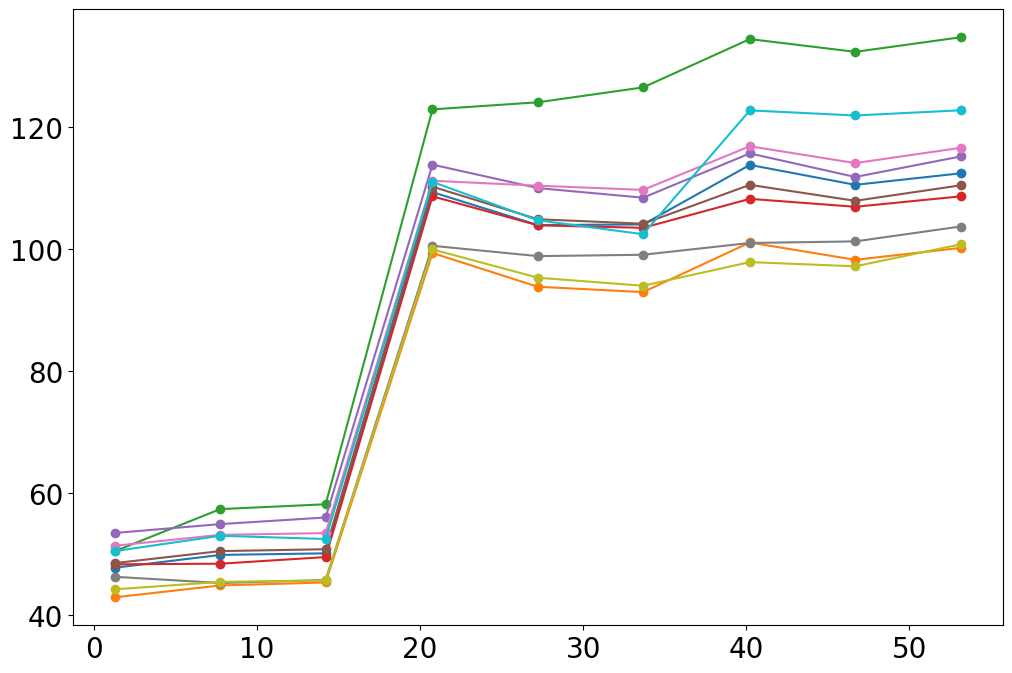

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[seed_60000], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ecar[seed_1000_representative].mean()/ecar[seed_1000_representative].mean().mean()
print(relative_mu)
normalized_1000 = ecar[seed_1000_representative]/relative_mu

relative_mu = ecar[seed_2500_representative].mean()/ecar[seed_2500_representative].mean().mean()
print(relative_mu)
normalized_2500 = ecar[seed_2500_representative]/relative_mu

relative_mu = ecar[seed_5000_representative].mean()/ecar[seed_5000_representative].mean().mean()
print(relative_mu)
normalized_5000 = ecar[seed_5000_representative]/relative_mu

relative_mu = ecar[seed_15000_representative].mean()/ecar[seed_15000_representative].mean().mean()
print(relative_mu)
normalized_15000 = ecar[seed_15000_representative]/relative_mu

relative_mu = ecar[seed_30000_representative].mean()/ecar[seed_30000_representative].mean().mean()
print(relative_mu)
normalized_30000 = ecar[seed_30000_representative]/relative_mu

relative_mu = ecar[seed_60000_representative].mean()/ecar[seed_60000_representative].mean().mean()
print(relative_mu)
normalized_60000 = ecar[seed_60000_representative]/relative_mu

B02    0.978153
B03    0.938347
B04    1.206022
B06    1.024985
B08    1.071415
B09    0.950428
B10    0.942718
B11    0.887933
dtype: float64
C02    0.976495
C03    0.816457
C04    0.930370
C05    1.049721
C06    1.048209
C07    1.041572
C08    1.097198
C09    1.045225
C10    0.994753
dtype: float64
D02    0.963647
D03    0.939208
D04    1.112917
D05    0.996945
D06    0.948869
D07    1.013271
D08    1.018864
D09    1.039812
D10    0.966467
dtype: float64
E02    0.997600
E03    0.976331
E05    1.046393
E06    1.036804
E07    0.897463
E08    1.035980
E10    1.018948
E11    0.990480
dtype: float64
F02    0.982752
F03    0.942035
F04    1.066386
F05    1.067189
F06    1.050491
F08    1.080676
F09    0.939376
F10    0.879472
F11    0.991624
dtype: float64
G02    0.999084
G03    0.895637
G04    1.172483
G05    0.979510
G06    1.045840
G07    0.994314
G08    1.042688
G09    0.924189
G10    0.897665
G11    1.048590
dtype: float64


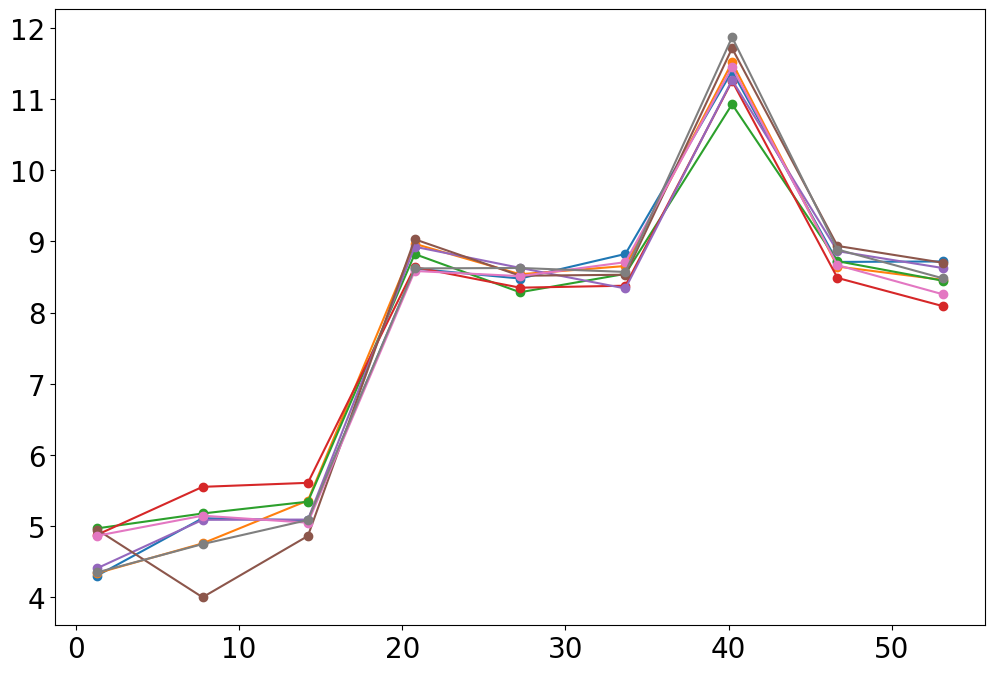

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_1000, 'o-')
matplotlib.pyplot.show()

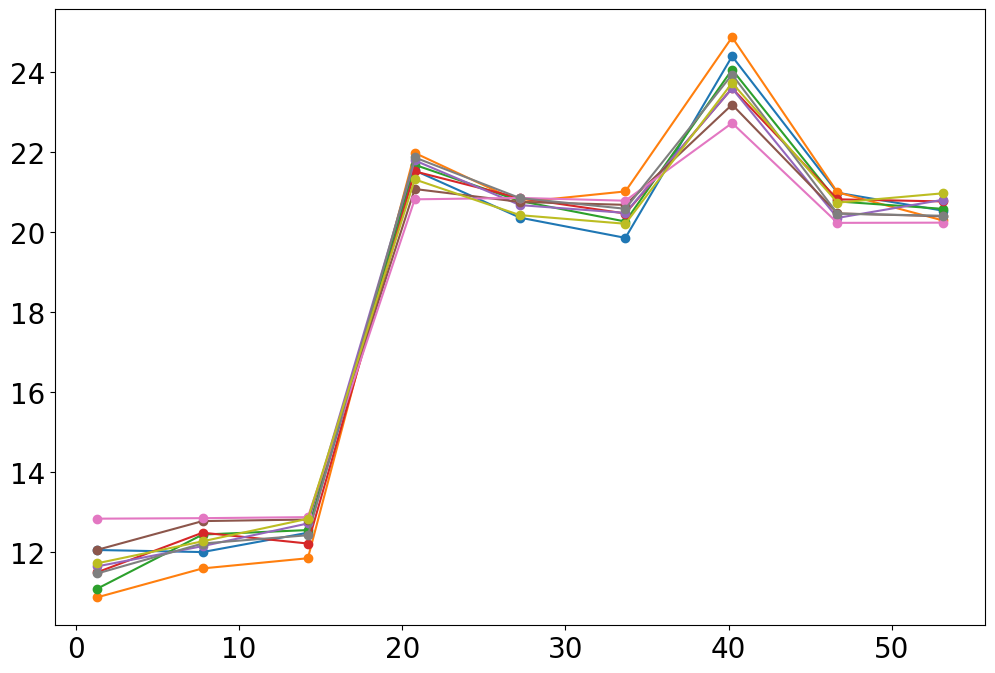

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_2500, 'o-')
matplotlib.pyplot.show()

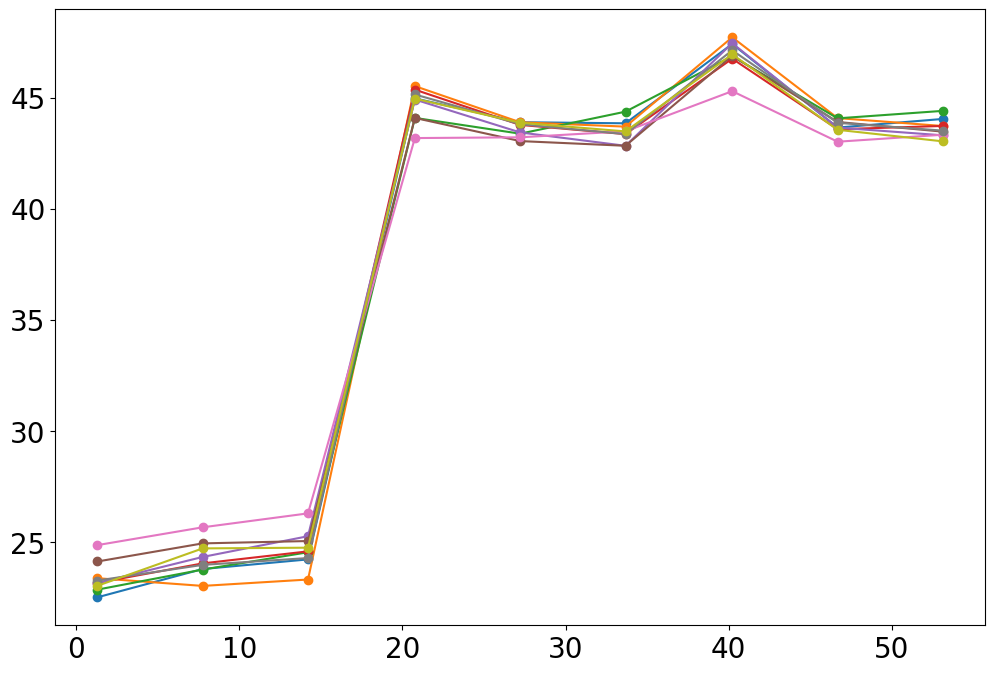

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_5000, 'o-')
matplotlib.pyplot.show()

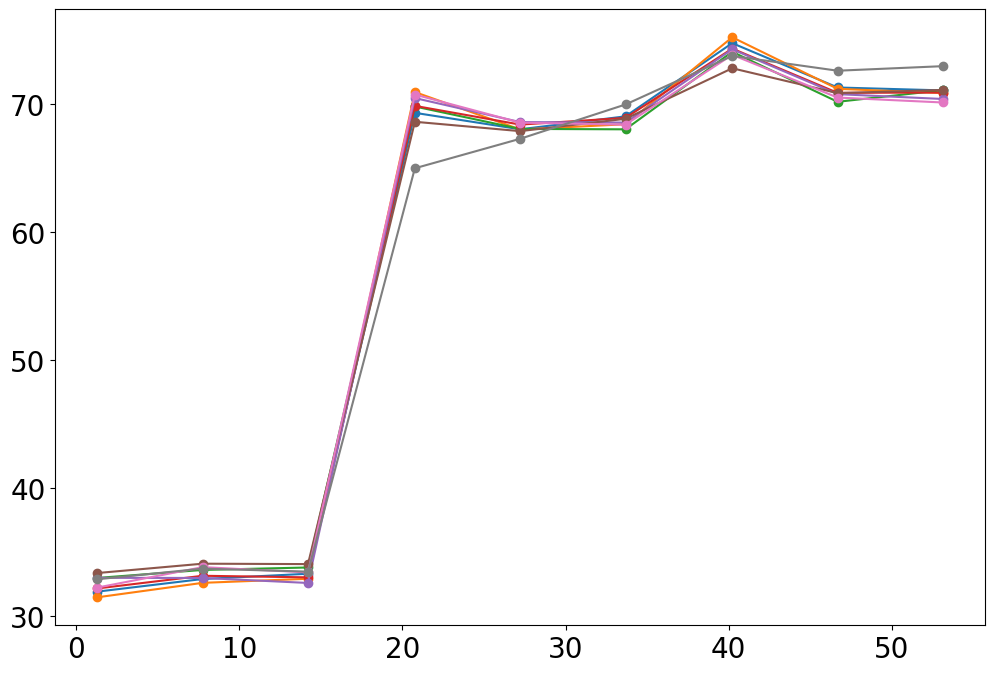

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_15000, 'o-')
matplotlib.pyplot.show()

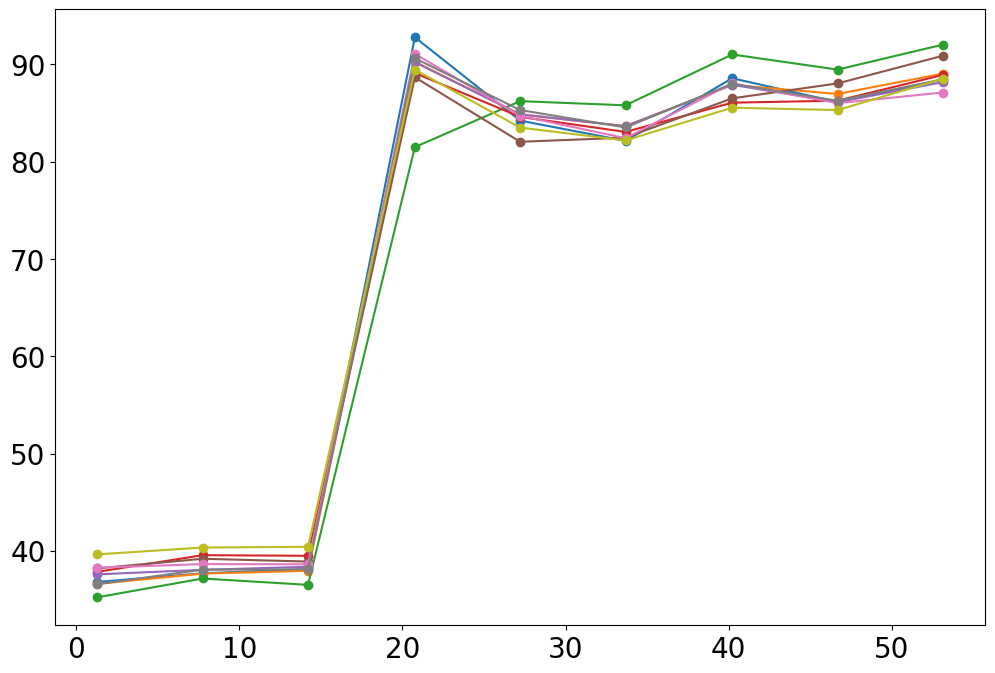

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_30000, 'o-')
matplotlib.pyplot.show()

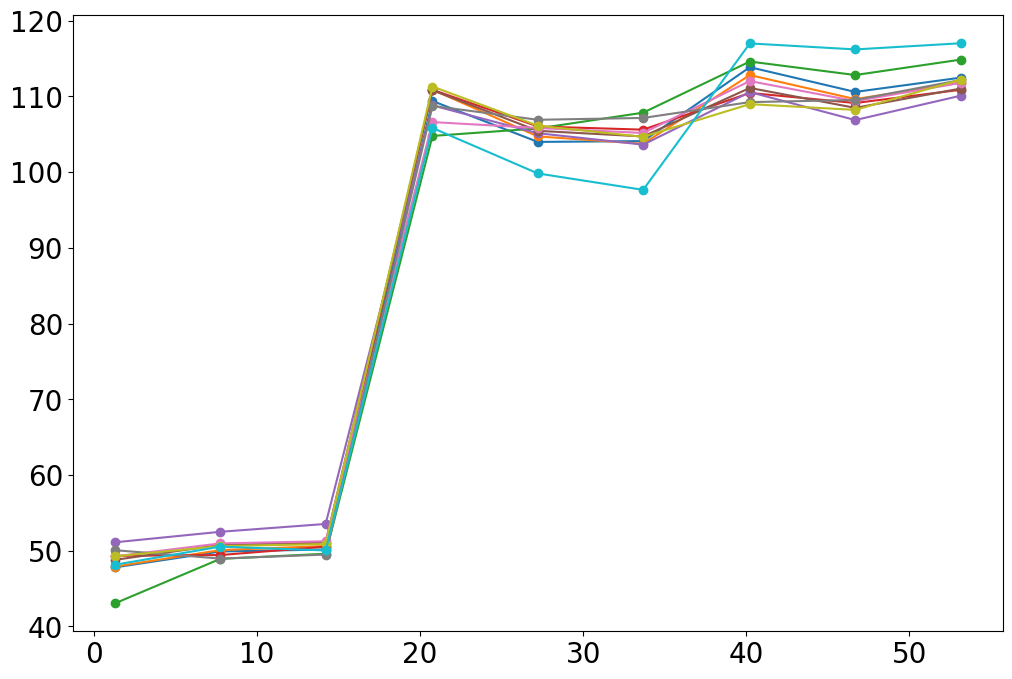

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_60000, 'o-')
matplotlib.pyplot.show()

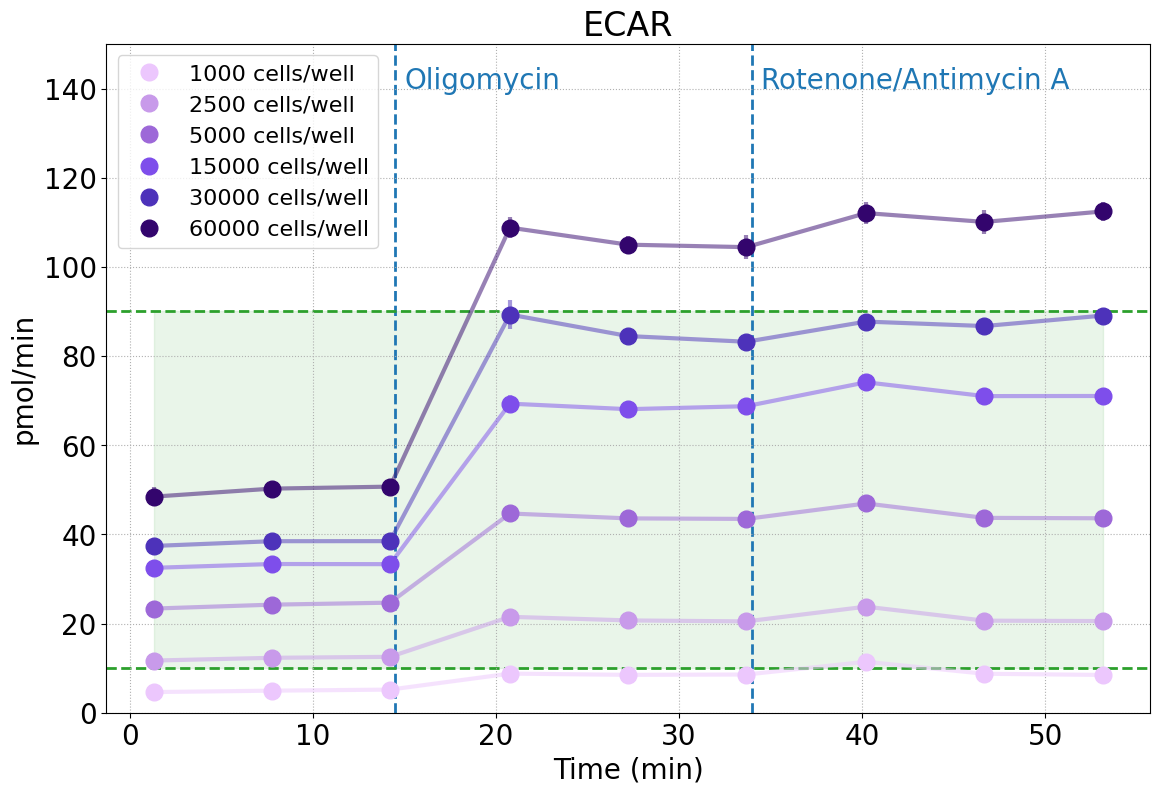

In [ ]:
mean = normalized_1000.mean(axis=1)
std = normalized_1000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#ECC7FD', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#ECC7FD', ms=12, label='1000 cells/well', zorder=999)

mean = normalized_2500.mean(axis=1)
std = normalized_2500.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#C89AEA', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#C89AEA', ms=12, label='2500 cells/well', zorder=999)

mean = normalized_5000.mean(axis=1)
std = normalized_5000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#9D68D8', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#9D68D8', ms=12, label='5000 cells/well', zorder=999)

mean = normalized_15000.mean(axis=1)
std = normalized_15000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#7E4EEB', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#7E4EEB', ms=12, label='15000 cells/well', zorder=999)

mean = normalized_30000.mean(axis=1)
std = normalized_30000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#4D32BA', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#4D32BA', ms=12, label='30000 cells/well', zorder=999)

mean = normalized_60000.mean(axis=1)
std = normalized_60000.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#33056D', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#33056D', ms=12, label='60000 cells/well', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=14.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.axhline(y=10, ls='--', lw=2, color='tab:green', zorder=1)
matplotlib.pyplot.axhline(y=90, ls='--', lw=2, color='tab:green', zorder=1)

matplotlib.pyplot.fill_between(timepoints, 10, 90, color='tab:green', alpha=0.1, zorder=0)

matplotlib.pyplot.text(15, 140, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(34.5, 140, 'Rotenone/Antimycin A', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 150])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('ECAR')
matplotlib.pyplot.legend(loc=2, prop={'size': 16})

matplotlib.pyplot.savefig('ecar.48h_seed_exp.ea.png')

In [ ]:
a = ecar[seed_1000].iloc[2, :].to_list()
b = ecar[seed_2500].iloc[2, :].to_list()
c = ecar[seed_5000].iloc[2, :].to_list()
d = ecar[seed_15000].iloc[2, :].to_list()
e = ecar[seed_30000].iloc[2, :].to_list()
f = ecar[seed_60000].iloc[2, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c); boxplot_basal.append(d); boxplot_basal.append(e); boxplot_basal.append(f)

In [ ]:
boxplot_basal_df = pandas.DataFrame({
    '1000': a,
    '2500': b,
    '5000': c,
    '15000': d,
    '30000': e,
    '60000': f
})

##**3.3. boxplots**

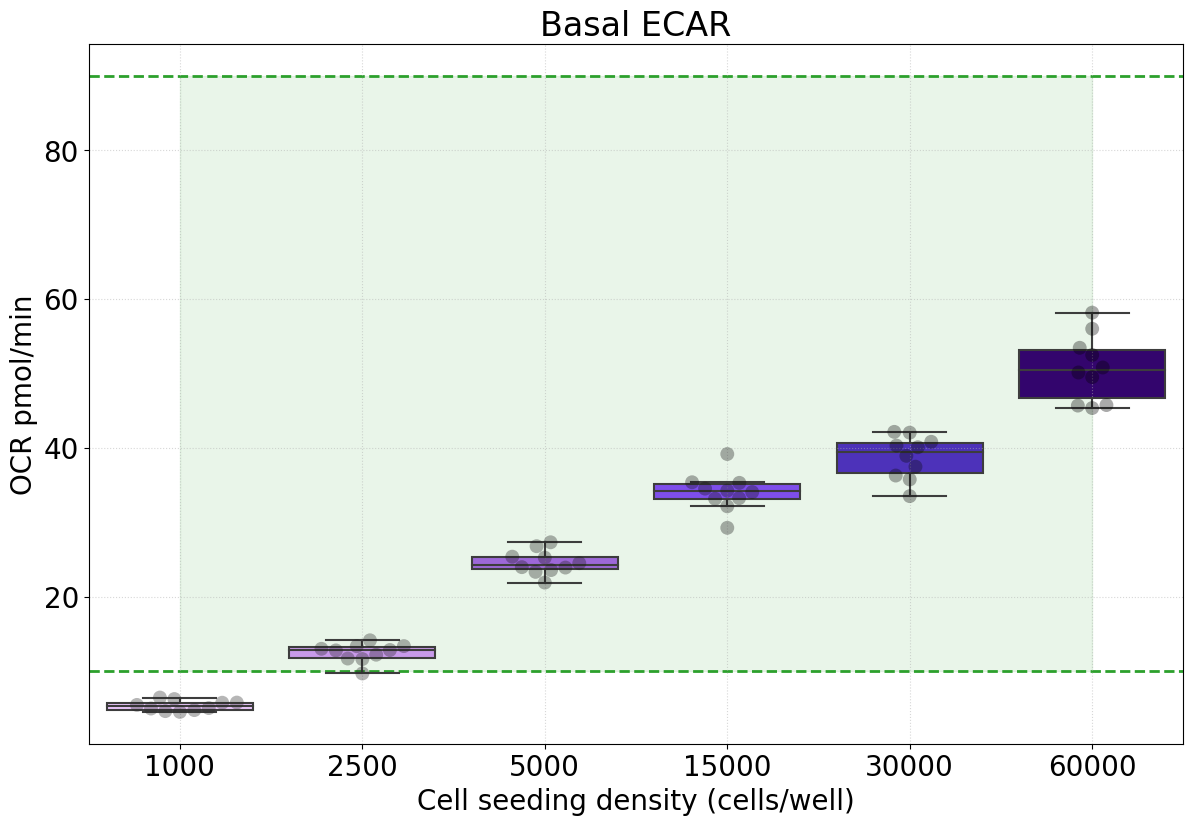

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_basal_df, showfliers=False)

# Define the colors for the boxes
colors = ['#ECC7FD', '#C89AEA', '#9D68D8', '#7E4EEB', '#4D32BA', '#33056D']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_basal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Basal ECAR')
matplotlib.pyplot.xlabel('Cell seeding density (cells/well)')
matplotlib.pyplot.ylabel('OCR pmol/min')

matplotlib.pyplot.axhline(y=10, ls='--', lw=2, color='tab:green', zorder=1)
matplotlib.pyplot.axhline(y=90, ls='--', lw=2, color='tab:green', zorder=1)

# Shade the region between the horizontal lines
categories = ['1000', '2500', '5000', '15000', '30000', '60000']
x_values = range(len(categories))
matplotlib.pyplot.fill_between(x_values, 10, 90, color='tab:green', alpha=0.1, zorder=0)


matplotlib.pyplot.savefig('ecar.basal.48h_seed_exp.png')